# SQLALCHEMY CHALLENGE

DEPENDENCIES

In [11]:
 %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [12]:
 import numpy as np
import pandas as pd
import datetime as dt
 # Statistical analysis
from scipy import stats


In [13]:
 # Python SQL toolkit and Object Relational Mapper
 # Import SQLAlchemy `automap` and other dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,func
from sqlalchemy import Column, Integer, String, Float

from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.engine import reflection
#Create Declarative Base
#Base = declarative_base()
#Base.metadata.create_all(engine)


In [14]:
# Create Database Connection
engine = create_engine('sqlite:///../Resources/hawaii.sqlite')

# STEP 1

# Reflect tables

In [25]:
#INSPECT
# Create inspection
inspector= inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [26]:
#measurement
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"]) 

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [27]:
#station
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"]) 

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [28]:
 # reflect an existing database into a new model
BaseReflect= automap_base()
# reflect the tables
BaseReflect.prepare(engine,reflect=True)
# View all of the classes that automap found
BaseReflect.classes.keys
 # Save references to each table
    
measurement= BaseReflect.classes.measurement
station= BaseReflect.classes.station

In [29]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(bind=engine)

# 1.1 Exploratory Precipitation Analysis

In [30]:
# Display the row's columns and data in dictionary format MEASURMENT
first_row_measurement = session.query(measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fa32fd2c6a0>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [31]:
# Display the row's columns and data in dictionary format STATION
first_row_station = session.query(station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fa32fd2cee0>,
 'longitude': -157.8168,
 'elevation': 3.0,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US'}

In [32]:
 engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [33]:
 # Total dates
session.query(func.count(measurement.date)).all()


[(19550)]

In [34]:
# Earliest Date
session.query(measurement.date).order_by(measurement.date).first()


('2010-01-01')

In [89]:
# Design a query to retrieve the last 12 months of precipitation data  and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
results_one_year=session.query(measurement.date, measurement.prcp).\
    filter(measurement.date < '2011-01-01').order_by(measurement.date).all()

results_one_year

[('2010-01-01', 0.08),
 ('2010-01-01', 0.28),
 ('2010-01-01', 0.21),
 ('2010-01-01', 0.15),
 ('2010-01-01', 0.15),
 ('2010-01-01', 0.05),
 ('2010-01-01', 0.14),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.02),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.01),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-05', 0.0),
 ('2010-01-05', 0.02),
 ('2010-01-05', 0.01),
 ('2010-01-05', 0.0),
 ('2010-01-05', 0.0),
 ('2010-01-05', 0.0),
 ('2010-01-06', None),
 ('2010-01-06', 0.02),
 ('2010-01-06', 0.11),
 ('2010-01-06', 0.01),
 ('2010-01-06', 0.08),
 ('2010-01-06', 0.36),
 ('2010-01-07', 0.06),
 ('2010-01-07', 0.38),
 ('2010-01-07', None),
 ('2010-01-07', 0.7),
 ('2010-01-0

In [36]:
date_plot= [result[0] for result in results_one_year]
prcp_plot = [result[1] for result in results_one_year]

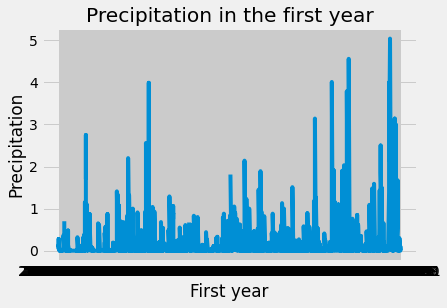

In [70]:
#  Matplotlib to plot the data
plt.plot(date_plot, prcp_plot)  # Plot some data on the (implicit) axes.

plt.xlabel('First year')
plt.ylabel('Precipitation')
plt.title("Precipitation in the first year")
plt.show()


In [38]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas to calcualte the summary statistics for the precipitation data
conn = engine.connect()
df = pd.read_sql('SELECT * FROM measurement', conn)
df.describe()

,id,prcp,tobs
count,19550.000000,18103.000000,19550.000000
mean,9775.500000,0.160644,73.097954
std,5643.743217,0.468746,4.523527
min,1.000000,0.000000,53.000000
25%,4888.250000,0.000000,70.000000
50%,9775.500000,0.010000,73.000000
75%,14662.750000,0.110000,76.000000
max,19550.000000,11.530000,87.000000


# Exploratory Station Analysis

In [46]:
df_II = pd.read_sql('SELECT * FROM station', conn)
df_II

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [40]:
# Design a query to calculate the total number stations in the dataset
# List the stations and the counts in descending order.
session.query(func.count(station.station)).all()

[(9)]

In [47]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
 #Using the most active station id from the previous query, 

#calculate the lowest, highest, and average temperature.



df_stations= df.groupby(["station"])
df_stations[["prcp"]].describe()

prcp                                                      
              count      mean       std  min     25%   50%     75%    max
station                                                                  
USC00511918  1932.0  0.047971  0.244826  0.0  0.0000  0.00  0.0100   4.00
USC00513117  2696.0  0.141921  0.433905  0.0  0.0000  0.02  0.1000   7.65
USC00514830  1937.0  0.121058  0.413812  0.0  0.0000  0.02  0.1000  11.53
USC00516128  2484.0  0.429988  0.712999  0.0  0.0100  0.16  0.5400   8.06
USC00517948   683.0  0.063602  0.243931  0.0  0.0000  0.00  0.0200   2.80
USC00518838   342.0  0.207222  0.508305  0.0  0.0025  0.03  0.1975   6.30
USC00519281  2772.0  0.212352  0.543312  0.0  0.0000  0.04  0.1900   9.64
USC00519397  2685.0  0.049020  0.210583  0.0  0.0000  0.00  0.0200   4.20
USC00519523  2572.0  0.114961  0.410237  0.0  0.0000  0.00  0.0700   6.38


Most active station
USC00513117

In [51]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station= session.query(measurement.station,measurement.date, measurement.prcp).\
    filter(measurement.date < '2011-01-01').\
    filter(measurement.station == 'USC00513117').\
    order_by(measurement.date).all()

type(active_station)

list

In [55]:
date_plot_station= [result[1] for result in active_station]
prcp_plot_station= [result[2] for result in active_station]

In [78]:
# Filter out null values from lists
active_station_list = []
for prcp in prcp_plot_station:
    if type(prcp) == float:
        active_station_list.append(prcp)

In [81]:
#active_station_list

In [86]:
import numpy as np
histo=np.histogram(active_station_list, bins=[0.5, 1])
histo

(array([8]), array([0.5, 1. ]))

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([0.5 , 1.25, 2.  , 2.75, 3.5 , 4.25, 5.  , 5.75, 6.5 , 7.25, 8.  ]),
 <a list of 2 BarContainer objects>)

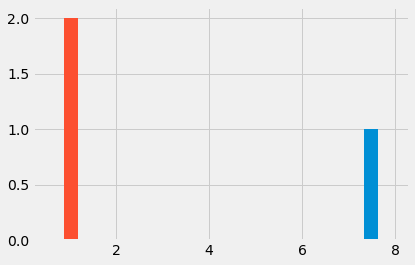

In [87]:
plt.hist(histo)

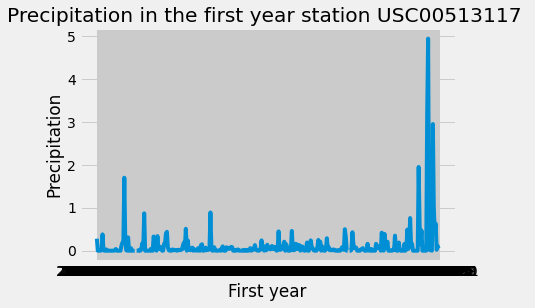

In [57]:
#  Matplotlib to plot the data
plt.plot(date_plot_station, prcp_plot_station, label='linear')  # Plot some data on the (implicit) axes.

plt.xlabel('First year')
plt.ylabel('Precipitation')
plt.title("Precipitation in the first year station USC00513117 ")
plt.show()

In [ ]:
#CLOSE SESSION

In [88]:
 # Close Session
session.close()